In [2]:
import mne
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier

mne.set_log_level('WARNING')
from tqdm import tqdm
import os


In [3]:
metric="f1"
root_path=r'E:\ZKP\persons comparision\Band Analysis\Epoch\Epoch_Super'
bands=['delta','theta','alpha','beta','gamma',"all"]
drug_path_before=os.path.join(root_path,'drug_before')
drug_path_before_s2=os.path.join(root_path,'drug_before_s2')
health_path=os.path.join(root_path,'health')
health_path_s2=os.path.join(root_path,'health_s2')
drug_path_after=os.path.join(root_path,'drug_after')
drug_path_after_s2=os.path.join(root_path,'drug_after_s2')


In [4]:
band="gamma"
path_1=drug_path_before
path_2=health_path
drug_data=pd.read_excel(os.path.join(path_1,band+'.xlsx')).iloc[:,:-1]
health_data=pd.read_excel(os.path.join(path_2,band+'.xlsx')).iloc[:,:-1]
X=np.concatenate((drug_data.values,health_data.values),axis=0)
X=X[:,:-7]
y=np.concatenate((np.ones(drug_data.shape[0]),np.zeros(health_data.shape[0])),axis=0)
feature_name=drug_data.columns[:].tolist()[:-7]


In [5]:


from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold
test_result_total=[]

kfold = StratifiedKFold(n_splits=5, shuffle=True)
feature_importance_dict=dict()

for train_indices, test_indices in kfold.split(X, y):
    clf=RandomForestClassifier()

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    clf.fit(X_train, y_train)
    test_results = permutation_importance(
        clf, X_test, y_test, n_repeats=20, 
    )
    
    test_result_total.append(test_results.importances)
test_result_total=np.concatenate(test_result_total,axis=1)
print(test_result_total.shape)



(31, 100)


In [6]:
total_importance=pd.DataFrame(test_result_total.T,columns=feature_name)
total_importance_sorted=total_importance.mean(axis=0).sort_values(ascending=False).index
total_importance_sorted=total_importance_sorted[:10]

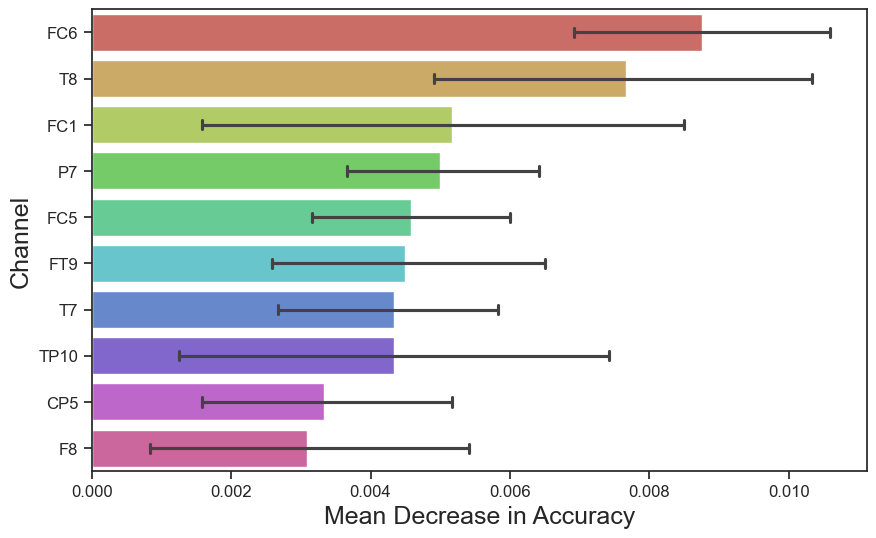

In [14]:
import seaborn as sns
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))
plt.ylabel("Channel",fontsize=18)
plt.xlabel("Mean Decrease in Accuracy",fontsize=18)
sns.barplot(data=total_importance.loc[:,total_importance_sorted],orient="h",errorbar=('ci', 95),capsize=.2,palette="hls")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()